In [ ]:
# Temperature data - Collins


In [ ]:
# Rainfall data - Thierry


In [21]:
# Emissions data - Jim

# Dependencies
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Save file path to variable
carbon_dioxide_csv = os.path.join("Resources", "CapeGrim_CO2_data_download.csv")
methane_csv = os.path.join("Resources","CapeGrim_CH4_data_download.csv")
nitrous_oxide_csv = os.path.join("Resources","CapeGrim_N2O_data_download.csv")

# Import emissions data
carbon_dioxide_df = pd.read_csv(carbon_dioxide_csv) 
methane_df = pd.read_csv(methane_csv)
nitrous_oxide_df = pd.read_csv(nitrous_oxide_csv) 

nitrous_oxide_df.head()

,YYYY,MM,DD,DATE,N2O(ppb),SD(ppb),Source
0,1978,4,26,1978.3178,299.19,0.23,Cape Grim air archive
1,1978,7,7,1978.5151,299.55,0.19,Cape Grim air archive
2,1980,9,3,1980.6749,301.66,0.07,Cape Grim air archive
3,1981,10,5,1981.7616,301.84,0.11,Cape Grim air archive
4,1984,5,23,1984.3934,302.98,0.11,Cape Grim air archive


In [22]:
# Calculate central tendencies for each year
# Methane
methane_gb = methane_df.groupby('YYYY')
emissions_df = methane_gb.agg(['mean','median'])
emissions_df = emissions_df.reset_index()
emissions_df = emissions_df[['YYYY', 'CH4(ppb)']]

# Carbon Dioxide
carbon_dioxide_gb = carbon_dioxide_df.groupby('YYYY')
cd_df = carbon_dioxide_gb.agg(['mean','median'])
cd_df = cd_df.reset_index()
cd_df = cd_df[['YYYY', 'CO2(ppm)']]
emissions_df = pd.merge(emissions_df, cd_df, how='outer', on='YYYY')

# Nitrous Oxide
nitrous_oxide_gb = nitrous_oxide_df.groupby('YYYY')
no_df = nitrous_oxide_gb.agg(['mean','median'])
no_df = no_df.reset_index()
no_df = no_df[['YYYY', 'N2O(ppb)']]
emissions_df = pd.merge(emissions_df, no_df, how='outer', on='YYYY')

# Clean up dataframe and sort by year - filter 1991 onwards
emissions_df = emissions_df.sort_values(by='YYYY', ascending=True)
emissions_df = emissions_df.loc[emissions_df['YYYY'] > 1990, :]
emissions_df = emissions_df.reset_index()
del emissions_df['index']
emissions_df.rename(columns = {'YYYY': 'Year'}, inplace = True)

emissions_df

Year     CH4(ppb)              CO2(ppm)              N2O(ppb)          
                 mean    median        mean    median        mean    median
0   1991  1674.079167  1678.190  352.691000  352.7570  308.670000  308.6700
1   1992  1687.101667  1688.000  354.173083  354.3655  309.294111  309.3160
2   1993  1688.873333  1690.740  354.921250  354.8900  309.255000  309.2540
3   1994  1694.108333  1697.095  356.364583  356.3470  309.914333  310.0640
4   1995  1700.219167  1701.975  358.399583  358.3705  310.465833  310.3665
5   1996  1701.956667  1702.960  359.910167  360.0380  311.132250  311.0695
6   1997  1709.091667  1711.700  361.252917  361.1240  312.158167  311.9175
7   1998  1716.510000  1719.715  363.755500  363.8260  313.020833  312.9120
8   1999  1726.644167  1728.255  365.694417  365.4935  313.957667  313.8115
9   2000  1728.113333  1729.415  366.977000  366.9800  314.801250  314.7170
10  2001  1726.761667  1727.680  368.500083  368.3555  315.331000  315.2605
11  2002  1728.770833  1730.695  370.634250  370.6500  316.036083  316.0885
12  2003  1729.384167  1730.870  372.896417  372.9945  316.544250  316.4685
13  2004  1728.829167  1729.085  374.769000  374.9720  317.351333  317.3320
14  2005  1728.065833  1729.655  376.755333  377.1025  318.049000  317.9785
15  2006  1727.487500  1728.765  378.679083  378.6025  318.849167  318.6460
16  2007  1732.938333  1736.485  380.562833  380.6455  319.500417  319.3360
17  2008  1741.478333  1740.630  382.692333  382.7645  320.754250  320.7080
18  2009  1743.940833  1744.650  384.255833  384.0820  321.417167  321.3785
19  2010  1750.475000  1753.050  386.074000  386.1105  322.423000  322.3755
20  2011  1757.905000  1758.005  387.939083  387.8820  323.254500  323.0840
21  2012  1762.029167  1763.720  389.971667  389.8990  324.293917  324.1245
22  2013  1765.729167  1767.870  392.824417  392.9635  325.087417  325.0605
23  2014  1775.110833  1779.225  394.832417  394.8770  325.982917  325.9250
24  2015  1785.967500  1788.665  397.303833  397.3440  327.111083  327.0445
25  2016  1791.726667  1792.820  400.469583  400.8925  327.778750  327.7015
26  2017  1798.500833  1802.445  402.436917  402.3675  328.663833  328.6270
27  2018  1810.715000  1812.905  404.909417  404.9275  330.230167  330.0855
28  2019  1816.769167  1818.480  407.338667  407.5305  330.729667  330.7570
29  2020  1824.838333  1828.305  409.665917  409.7570  331.558273  331.4850

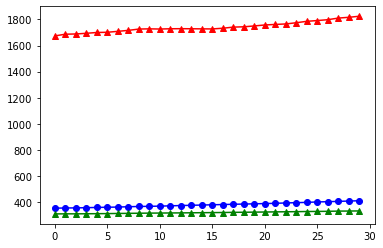

In [29]:
# methane_dioxide_df.plot()
x_axis = np.arange(0, 30, 1)

co_handle, = plt.plot(x_axis, emissions_df['CO2(ppm)']['mean'], marker ='o', color='blue', label="Methane")
ch_handle, = plt.plot(x_axis, emissions_df['CH4(ppb)']['mean'], marker='^', color='red', label="Carbon Dioxide")
no_handle, = plt.plot(x_axis, emissions_df['N2O(ppb)']['mean'], marker='^', color='green', label="Nitrous Oxide")


In [ ]:
# Deforestation data - Spyro


In [ ]:
# Bushfire incident data - Vanessa
